## Agent Based Modeling (ABM): Apple Trading Model 3

-----------

This material is based on the previous version of CS108L, see https://cs4all.cs.unm.edu/cs108.html
- Credit to Prof. Melanie Moses, Dr. Irene Lee, Dr. Maureen Psaila-Dombrowski, Prof. Dave Ackley and collaborators (see website)

### Computational Science 
- ABM is part of the much broader field of computational science (not computer science!)
- Computational science is the intersection of computer science, mathematices, and science (like biology, or chemistry, or physics)

<img src="https://raw.githubusercontent.com/jbschroder/CS108/main/lecture_images/venn_diagram.png" width="350">

### Computational Science
- Combine math, computer science, and application(s) in the sciences
- We model real world problems to gain insight an knowledge
- Typically choose real world problems that are too big, too complex, too dangerous, or too expensive to conduct in real life
    - Medicine, national security, large economies, ...
- Run many "what-if" scenarios quickly, analyze data
    - Computers are always getting faster, so computational science is only getting more important and powerful

### Computational Science Workflow
1. Real World Problem --> Simplify


2. Working Model --> Develop equations and algorithm


3. Computational Model --> Simulate


4. Results/Conclusion --> Interpret 
    - And if needed, go back and update model and start again at step 1



### Review: ABM phases
- Setup: instantion (creation) of world
    - Describe the world you will be modeling and the rules that describe it
- Runtime loop: Each loop iteration: 
    - Represents one tick, or movement forward in time (minute, hour, day, ...)
    - Each agent changes it's state (say, gets more apples, or a tree catches on fire)
    - Any needed changes to world also occur, like a resource is consumed or added to    
- Exit

<img src="https://raw.githubusercontent.com/jbschroder/CS108/main/lecture_images/agent_based_modeling.png" width="300">

### ABM Summary

1. ABM uses three main abstractions
    - Agents with rules
    - Environment or model within which the agents live
        - This would be a grid for apple trading, where traders walk around
    - Time: time is dictated (controlled) by a the runtime loop.
        - Each loop iteration is one tick or one step of abstracted time
    

2. ABM model is a representation of the interaction of real-world objects in a complex system
    - The goal is to gain an understanding of how the model's results relate to real-world phenomena
    - Random factors built into the model and variables changed by the user (you) cause different results to be generated each time a model is run
        - When you run a model many times, each time you get a different outcome
    - We are constructing a model, not a replica    

### Learning Goals
1. Continue learning about ABM 
    1. How to use ABM
        - Conduct experiments by changing values and variables (like how many apples agents start with, or how combustible a tree is)
        - Collect and analyze results

    2. Learn how to modify ABM
        - Deconstruct models into agents, behaviors, environment, and interactions
     
    3. Learn how to create ABM
        - Implement and evaluate models

2. Learn how to generate more informative plots and results by running model many times
    - Continue using the apple trading model from last lab
    - Each step, if an agent has an apple, 
    - Choose one agent at random and give them an apple
    - Like all the agents are in a room, trading at random with each other
    
3. Practice running multiple experiments methodically, comparing and interpreting results

### First, we have to make sure that Mesa is installed, and then import our basic packages
- Note that Pandas and Seaborn or "built-in" packages, so we only have to import them, not install them

In [ ]:
! pip install mesa==2.1.1

In [1]:
import mesa

# Data visualization tools.
import seaborn as sns

# Data manipulation and analysis.
import pandas as pd

### Now, we can begin creating our apple trading agent based model (ABM)

### First, we define the AppleTraderAgent object, keeping it the same from the previous lab.

- Remember, this object inherits from the class `mesa.Agent`
    
- Remember: Each Step, 
    - If an agent has an apple
    - Choose one agent at random and give them an apple
    - Remember that the model step calls each agent step in random order

- This is like all the agents are in a room, trading at random with each other


In [ ]:
# Create ABM

# 1. Define the Agent Abstraction
class AppleTraderAgent(mesa.Agent):
    """An agent that trades apples and begins with 1 apple."""

    def __init__(self, unique_id, model):
        # Pass the parameters to the parent class.
        super().__init__(unique_id, model)

        # Create the agent's number of apples and set initial value
        self.NumberApples = 1

    def step(self):
        # Verify agent has some apples
        if self.NumberApples > 0:
            other_agent = self.random.choice(self.model.schedule.agents)
            if other_agent is not None:
                other_agent.NumberApples += 1
                self.NumberApples -= 1
                
                

### Next, we create our AppleTradingModel.  We leave this the same as before (for now).

### This defines two more of our key abstractions:
1. This defines the environment where the agents (apple traders) exist
2. This also defines how to take a step (tick) forward in time

### Similar to the agent, the AppleTradingModel inherits from `mesa.Model`
- The `__init__` function describes how to create the environment and agents, using inheritance

In [3]:
# 2. Define the Model (or environment) Abstraction for the Agents to live in
class AppleTradingModel(mesa.Model):
    """A model with some number of apple trading agents."""

    def __init__(self, N):
        self.num_agents = N
        # Create scheduler and assign it to the model
        self.schedule = mesa.time.RandomActivation(self)

        # Create agents
        for i in range(self.num_agents):
            a = AppleTraderAgent(i, self)
            # Add the agent to the scheduler
            self.schedule.add(a)

    # 3. Define each step or time tick: 
    #    Each step or tick will call the AppleTraderAgent.step() function once
    def step(self):
        """Advance the model by one step."""

        # The model's step will call the step method of each agent
        self.schedule.step()

### And now to run the model, the syntax is easy!
1. We first create a new AppleTradingModel object called `model`
2. Then, we take 100 steps with the model

### Key Point: Running `AppleTradingModel.step()` once, in turn runs `AppleTraderAgent.step()` once for each agent

### Key Point: Remember that the agents act in a random order
  - Each `model.step()` every agents acts once, but in a random order
    


In [ ]:
all_agents_NumberApples = []

# This runs the model 100 times, each model executing 100 steps.
for j in range(100):
    # Run the model
    model = AppleTradingModel(10)
    for i in range(100):
        model.step()

    # Store the results
    for agent in model.schedule.agents:
        all_agents_NumberApples.append(agent.NumberApples)

### Lastly, we plot a histogram with Seaborn
- Seaborn provides really sharp plots with little effort
- Pandas also provides histograms, but Seaborn requires less effort

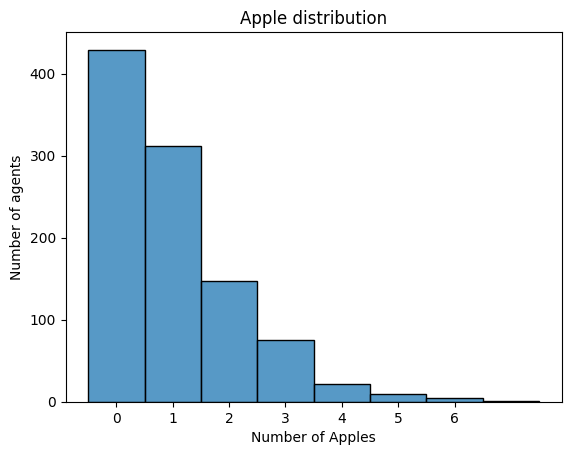

In [4]:
# Use seaborn for plotting 
df = pd.DataFrame({'all_agents_NumberApples': all_agents_NumberApples})
ax = sns.histplot(df['all_agents_NumberApples'], discrete=True)
ax.set(title="Apple distribution", xlabel="Number of Apples", ylabel="Number of agents" 
       
max_apples_owned = df['all_agents_NumberApples'].max() + 1
ax.set_xticks(range(0,max_apples_owned), labels=range(0,max_apples_owned));

In [2]:
Compute averages as first task...

Generate separate plots (copy and past cells) for
  50 steps
  100 steps
  200 steps
  400 steps
  800 steps
what do you find?

Repeat for more agents (30)
what do you fine?



# could imagine some kind of write up on this, leave interpretations very open ended, running multiple times, 
# seeing variability, learning about randomness

# create averages...new plots...

# need to compute averages...


# Can keep expanding on your discussion from Monday...